# Scraping and analysing 'eltiempo.com' articles with NLP: Beatifulsoup4 and Spacy application

In [46]:
#importting required libraries
import requests
from bs4 import BeautifulSoup
import re
import spacy
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
# this the url from the nota/article/news from el tiempo.com
# url = 'https://www.eltiempo.com/tecnosfera/apps/facebook-se-filtran-datos-de-533-millones-de-cuentas-en-la-red-social-578072'
url = 'https://www.eltiempo.com/mundo/razones-por-las-que-ee-uu-busca-a-cabecillas-del-eln-por-narcotrafico-577767'

In [3]:
#request content from the url
try:
    page = requests.get(url)
except:
    print('Contenido del articulo no disponible')

In [4]:
# making the soup (bs4) ready for scrap
# using the parser 'html5lib'
soup = BeautifulSoup(page.text, 'html5lib')

In [5]:
# the article content can be found in the <p> tags with class = 'contenido'
# all the text found in those tags are appended to a list called nota
nota = []
for p in soup.find_all('p', 'contenido'):
    nota.append(p.text)

In [6]:
# all the elements of the list 'nota' is joined in one string element called nota
nota = ' '.join(nota)

In [7]:
# cleaning the article using some regular expresions and some sub basics functions
nota = re.sub(r'\(.+?\)',' ', nota) # remove all content that is between two round brackets (references to other articles)
nota = re.sub(r'-.+', ' ', nota) # foot notes related to other links
nota = nota.replace('\xa0', ' ') # \xa0 not breaking space symbol
nota = nota.replace('\'',' ') # Character for ''
nota = nota.replace('.', ' ') # remove point for empty space
nota = nota.replace('"', ' ') # revome double quotation mark

In [8]:
# the article is ready for analysis
nota

'Durante décadas, el Ejército de Liberación Nacional   se había mantenido por fuera del radar de las autoridades estadounidenses  Al menos en lo que se refiere al narcotráfico Si bien este grupo es considerado terrorista por este país desde 1999, hasta ahora no lo habían vinculado por tráfico de estupefacientes  Por eso llamó la atención que Washington solicitará en extradición en febrero pasado a 11 de sus miembros   Una de las cuales, la de José Gabriel Álvarez Ortiz, ya fue aprobada por la Corte Suprema de Justicia y firmada por el presidente Iván Duque  Se trata del primer miembro de este grupo que enfrentará cargos ante una corte de este país, en Texas, por este delito  Lo curioso es que, a la fecha, el ELN no figura como organización narcotraficante en ninguno de los listados que realiza EE  UU  anualmente y donde suele identificar a quienes se dedican a esta actividad En el departamento del Tesoro, la Oficina para el Control de Activos  , incluye al ELN como una FTO   y como un 

# Basic news analysis using natural language processing (NLP) with spacy

In [9]:
# uncomment and install spacy packages if not present in the system
#!pip3 install spacy
#!python -m spacy download es_core_news_lg

In [10]:
# defining the pretrained model
# es_core_news_lg is a trained model based on news sites
# Unlike the EN model which is based on news, blogs and comments
nlp = spacy.load('es_core_news_lg')

In [11]:
# defining the nlp element based on the resulting note string
doc = nlp(nota)

In [12]:
# tokenization
# print tokens in the document (news article in this case)
# the library is capable to recognize elements of the text as POS: Part-of-speech tag
# morphology
# lemma: base for of the word
# entities among other objects
for t in doc:
    print(t, '|', t.pos_, '|', t.lemma_)

Durante | ADP | durante
décadas | NOUN | década
, | PUNCT | ,
el | DET | el
Ejército | PROPN | Ejército
de | ADP | de
Liberación | PROPN | Liberación
Nacional | PROPN | Nacional
   | SPACE |   
se | PRON | él
había | AUX | haber
mantenido | VERB | mantener
por | ADP | por
fuera | NOUN | fuera
del | ADP | del
radar | NOUN | radar
de | ADP | de
las | DET | el
autoridades | NOUN | autoridad
estadounidenses | ADJ | estadounidense
  | SPACE |  
Al | ADP | Al
menos | ADV | menos
en | ADP | en
lo | PRON | él
que | PRON | que
se | PRON | él
refiere | VERB | referir
al | ADP | al
narcotráfico | NOUN | narcotráfico
Si | SCONJ | Si
bien | ADV | bien
este | DET | este
grupo | NOUN | grupo
es | AUX | ser
considerado | VERB | considerar
terrorista | NOUN | terrorista
por | ADP | por
este | DET | este
país | NOUN | país
desde | ADP | desde
1999 | NOUN | 1999
, | PUNCT | ,
hasta | ADP | hasta
ahora | ADV | ahora
no | ADV | no
lo | PRON | él
habían | AUX | haber
vinculado | VERB | vincular
por | ADP | 

In [13]:
# remove remaining puntuation not necessary for the analysis
# and save the remaining tokens in doc_list
doc_list = [t for t in doc if not t.is_punct] 

In [14]:
# remove additional empty spaces if present
doc_list = [t for t in doc_list if not t.is_space]

In [15]:
# finally article list is defined with the text of all tokens defined in  doc_list
article = [t.text for t in doc_list]

In [16]:
# all the elements of the list are joined to generate one string
article = ' '.join(article)

In [17]:
# this is the final form of the article to be analyzed
article

'Durante décadas el Ejército de Liberación Nacional se había mantenido por fuera del radar de las autoridades estadounidenses Al menos en lo que se refiere al narcotráfico Si bien este grupo es considerado terrorista por este país desde 1999 hasta ahora no lo habían vinculado por tráfico de estupefacientes Por eso llamó la atención que Washington solicitará en extradición en febrero pasado a 11 de sus miembros Una de las cuales la de José Gabriel Álvarez Ortiz ya fue aprobada por la Corte Suprema de Justicia y firmada por el presidente Iván Duque Se trata del primer miembro de este grupo que enfrentará cargos ante una corte de este país en Texas por este delito Lo curioso es que a la fecha el ELN no figura como organización narcotraficante en ninguno de los listados que realiza EE UU anualmente y donde suele identificar a quienes se dedican a esta actividad En el departamento del Tesoro la Oficina para el Control de Activos incluye al ELN como una FTO y como un SDGT con fecha de este 3

In [18]:
# discover entities in the article
for ent in doc.ents:
    print(ent.text, ent.label_)

Ejército de Liberación Nacional ORG
Si bien este grupo MISC
Washington LOC
José Gabriel Álvarez Ortiz PER
Corte Suprema de Justicia LOC
Iván Duque   PER
Texas LOC
Lo curioso MISC
ELN MISC
EE LOC
UU LOC
Tesoro LOC
Oficina para el Control de Activos   ORG
ELN MISC
SDNT    MISC
SDNTK MISC
Lista Clinton PER
Farc ORG
Farc ORG
Los Urabeños ORG
Clan ORG
Tesoro LOC
EE UU LOC
Eln ​   En ORG
Valoración Anual sobre Drogas MISC
DEA ORG
Farc ORG
Bacrim ORG
Departamento de Estado   ORG
EE LOC
Eln ORG
EE UU LOC
Farc ORG
Eln ORG


Some of the found entities are related with organizations "ORG" (companies, agencies, intitutions, etc) like FARC. 
Persons 'PER' related to the name of the person or a family like 'Ivan Duque'.
Locations 'LOC' related to


In [19]:
# spacy have a function to describe all avaible objects
spacy.explain('PER')

'Named person or family.'

In [20]:
# it is possible to show all the found entities directly in the document
# rendering the document along with the higlithed entities
spacy.displacy.render(doc, style='ent')

### Finding words according with the linguistic element
It is possible to find some specfic words in the article if the linguistic object is referred (i.e verbs. proper nouns, numeric, dates, and so on). 
To do this the linguistic element must be filter according with the associated method

In [21]:
# for verbs the tokens are filtered with the pos_ method
# along with the verb it is possible show the root form of the verb, this is lemmatization
for t in doc:
    if t.pos_=='VERB':
        print(t, '|', t.lemma_)

mantenido | mantener
refiere | referir
considerado | considerar
vinculado | vincular
llamó | llamar
solicitará | solicitar
aprobada | aprobar
trata | tratar
enfrentará | enfrentar
figura | figurar
realiza | realizar
suele | soler
identificar | identificar
dedican | dedicar
incluye | incluir
implican | implicar
figuran | figurar
desprenden | desprender
asocian | asociar
ponerlo | poner él
reciben | recibir
implica | implicar
evalúa | evalúar
figura | figurar
realiza | realizar
aparecen | aparecer
mencionan | mencionar
identifican | identificar
sucede | suceder
publicó | publicar
comenzado | comenzar
detectar | detectar
desmovilizó | desmovilizar
abandonó | abandonar
crearon | crear
comenzado | comenzar
llenado | llenar
sostienen | sostener
usado | usar


In [22]:
# proper noun
for t in doc:
    if t.pos_=='PROPN':
        print(t)

Ejército
Liberación
Nacional
Washington
José
Gabriel
Álvarez
Ortiz
Corte
Suprema
Justicia
Iván
Duque
Texas
ELN
EE
UU
Tesoro
Oficina
Control
Activos
ELN
FTO
SDGT
SDNT
SDNTK
Lista
Clinton
Farc
Farc
Urabeños
Clan
Golfo
Tesoro
EE
UU
Eln
​
Valoración
Anual
Drogas
DEA
Farc
Bacrim
Departamento
Estado
EE
UU
Eln
EE
UU
Farc
Eln


In [23]:
# numeric values
for t in doc:
    if t.pos_=='NUM':
        print(t)

11
31
Ambas
dos
dos
2020
2020


In [24]:
# dates
for ent in doc.ents:
    if ent.label_ == 'DATE':
        print(ent)
# dates not found, this will be addressed next

# Matching some other relevant elements as dates

Althoug the model used here have a good performance and precision in most of the NLP task, there is still some space for improvements. Some of the dates are not recogniced as expected, for address this problem the spacy matcher will be used.

The matcher works with patterns which could be construted with the spacy linguistic elements (POS, TAG, and so on). Lets see:

In [25]:
# Import the matcher
from spacy.matcher import Matcher

In [26]:
# generate the matcher class with the nlp and doc vocabulary
matcher = Matcher(nlp.vocab)

In [27]:
# adding patterns to the matcher
# these patterns describe some common ways in which dates are written
date_1 = [{'LOWER': {'IN':['en', 'el', 'desde', 'año']}},{'IS_DIGIT':True}]
date_2 = [{'IS_DIGIT':True}, {'LOWER': 'de', 'OP':'?'}, {'LOWER': {'IN':['enero','febrero','marzo','abril','mayo','junio','julio','agosto','septiembre','octubre','noviembre','diciembre']}}]

In [28]:
# adding patterns to the matcher
matcher.add('DATES_1', [date_1])
matcher.add('DATES_2', [date_2])

In [29]:
#generating information for the matches (id, start, end)
matches = matcher(doc)

In [30]:
# Matches information: id, span with start and end of the match
for match_id, start, end in matches:
    print(match_id, doc[start:end])

7908286269410088726 desde 1999
13036428752754894082 31 de marzo
7908286269410088726 año 2020
7908286269410088726 año 2020
7908286269410088726 el 2016


In [31]:
# adding matches to the ents method
for match_id, start, end in matches:
    # create a new Span for each match and use the match_id as the label
    span = spacy.tokens.Span(doc, start, end, label=match_id)
    doc.ents = list(doc.ents) + [span]  # add span to doc.ents

print([(ent.text, ent.label_) for ent in doc.ents])  #

[('Ejército de Liberación Nacional', 'ORG'), ('Si bien este grupo', 'MISC'), ('desde 1999', 'DATES_1'), ('Washington', 'LOC'), ('José Gabriel Álvarez Ortiz', 'PER'), ('Corte Suprema de Justicia', 'LOC'), ('Iván Duque  ', 'PER'), ('Texas', 'LOC'), ('Lo curioso', 'MISC'), ('ELN', 'MISC'), ('EE', 'LOC'), ('UU', 'LOC'), ('Tesoro', 'LOC'), ('Oficina para el Control de Activos  ', 'ORG'), ('ELN', 'MISC'), ('31 de marzo', 'DATES_2'), ('SDNT   ', 'MISC'), ('SDNTK', 'MISC'), ('Lista Clinton', 'PER'), ('Farc', 'ORG'), ('Farc', 'ORG'), ('Los Urabeños', 'ORG'), ('Clan', 'ORG'), ('Tesoro', 'LOC'), ('EE UU', 'LOC'), ('Eln \u200b   En', 'ORG'), ('Valoración Anual sobre Drogas', 'MISC'), ('DEA', 'ORG'), ('año 2020', 'DATES_1'), ('Farc', 'ORG'), ('Bacrim', 'ORG'), ('año 2020', 'DATES_1'), ('Departamento de Estado  ', 'ORG'), ('EE', 'LOC'), ('Eln', 'ORG'), ('EE UU', 'LOC'), ('el 2016', 'DATES_1'), ('Farc', 'ORG'), ('Eln', 'ORG')]


In [32]:
# display the doc adding the date as new entities
spacy.displacy.render(doc, style='ent')

# Generating word cloud

In [54]:
# generating a clean string without stopwords
doc_clean = []
for t in doc_list:
    if not t.is_stop and t.pos_ != 'CCONJ': # 'Coordinating conjuction' is an 'y'. Not important
        doc_clean.append(t)

In [55]:
# now we get the lemma or the root form for every remaining word in the article
doc_lemma = []
for t in doc_clean:
    doc_lemma.append(t.lemma_)
doc_lemma = ' '.join(doc_lemma)

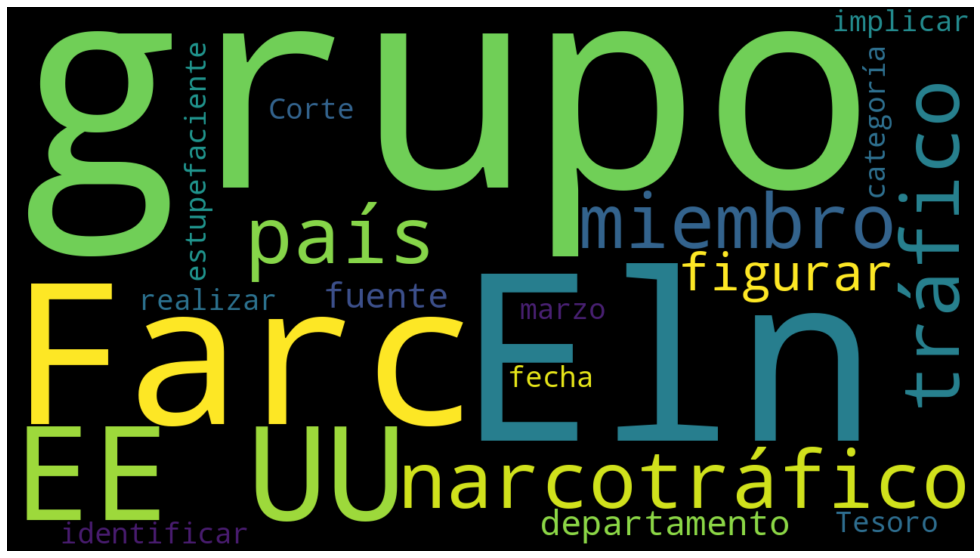

In [60]:
# generating wordcloud for the first 20 most frequent words
wordcloud = WordCloud(width=1280, height=720, max_words=20).generate(doc_lemma)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()